In [2]:
import quandl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
import scipy.fftpack as fft
import pandas as pd
from pylab import *
import pandas as pd
import stats
from scipy.signal import fftconvolve
import pprint

In [3]:
class FFT():
    def __init__(self,instrument_name, authtoken, start_date, end_date):
        self.instrument_name = instrument_name
        self.authtoken = authtoken
        self.start_date = start_date
        self.end_date = end_date

    def quandl_data(self):
        mydata = quandl.get(self.instrument_name, authtoken=self.authtoken, start_date=self.start_date, end_date=self.end_date)
        return mydata
        

    def detrending_data(self):
        
        mydata = self.quandl_data()
        detrend_data =sc.detrend(mydata, axis=0)
        return detrend_data


    def smooth_detrended (self, N):
        detrend_data = self.detrending_data()
        w = sc.blackman(N) #we selected 20 the parameter of the blackman window function 
        w = np.expand_dims(w, axis=1)
        y = fftconvolve(detrend_data, w/w.sum(), mode ='same')
        return y

    def fft_cal(self):
        y = self.smooth_detrended(N)
        mydata = self.quandl_data()
        fft_v = abs(np.fft.rfftn(y))
        return fft_v

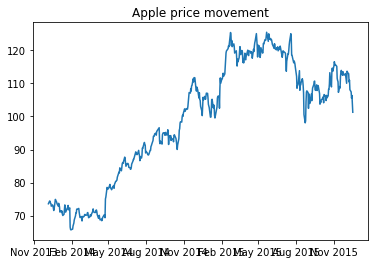

In [4]:
if __name__ == '__main__':
    
    p2 = FFT('EOD/AAPL.11','ENTER API KEY','2013-12-06','2015-12-20')
   

    plt.plot(p2.quandl_data())
    plt.title("Apple price movement")
    plt.show()

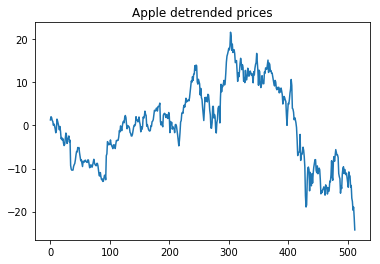

In [5]:
    plt.plot(p2.detrending_data())
    plt.title("Apple detrended prices")
    plt.show()

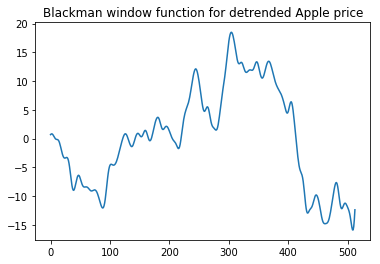

In [6]:
    N = 20
    plt.plot (p2.smooth_detrended(N))
    plt.title("Blackman window function for detrended Apple price")
    plt.show()

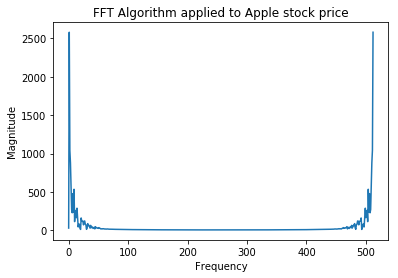

In [7]:
    plt.plot (p2.fft_cal())
    plt.title("FFT Algorithm applied to Apple stock price") 
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.show()

In [8]:
print(concatenate(list(p2.fft_cal())))

[  29.93620971 2581.44311589 1043.44513128  879.48642397  562.75105257
  271.02004731  229.31731061  479.14639216  234.96713587  535.48502405
  113.92998392  260.25326466  180.88789862  165.8983879   289.0478823
  170.42834274   44.714126     85.41138546   78.32200728   33.89501271
   12.27150482  161.70003823  121.19569458  120.59598064  114.55047975
   71.94835267  121.94279622  121.65325736   79.34673108   73.31914956
   13.82371197   31.8972728    88.1239041    62.36129107   66.67025577
   46.29315365   29.76536454   65.2475242    34.48589343   48.71265285
   39.2731803    25.43085281   28.73948375   40.85052969   19.44383385
   48.05437252   36.71880799   34.46387917   28.09162612   30.97534656
   25.70709416   36.13076883   29.13708151   25.95033502   19.15786393
   19.27356671   21.74011977   19.33428836   21.72503817   20.84856345
   17.81234065   18.72986707   16.97713921   16.47424578   18.1066385
   18.47392315   17.30099759   16.15301915   15.61105395   15.72512081
   15.69